In [ ]:
!pip install numpy matplotlib imageio

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Figura 2D con puntos - triángulo



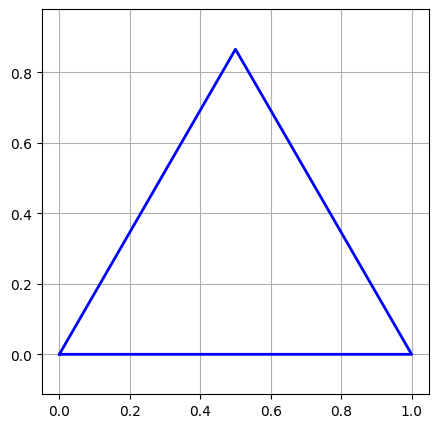

In [ ]:
triangulo = np.array([
    [0, 0],
    [1, 0],
    [0.5, 0.866],
    [0, 0]
])

plt.figure(figsize=(5, 5))
plt.plot(triangulo[:,0], triangulo[:,1], 'b-', linewidth=2)
plt.axis('equal')
plt.grid()
plt.show()


# Aplicar traslación, rotación y escala usando matrices de transformación


In [ ]:
def traslacion(dx, dy):
    return np.array([
        [1, 0, dx],
        [0, 1, dy],
        [0, 0,  1]
    ])

def rotacion(angulo):
    return np.array([
        [np.cos(angulo), -np.sin(angulo), 0],
        [np.sin(angulo),  np.cos(angulo), 0],
        [0, 0, 1]
    ])

def escalado(sx, sy):
    return np.array([
        [sx, 0,  0],
        [0, sy,  0],
        [0,  0,  1]
    ])


In [ ]:
def aplicar_transformacion(puntos, matriz_transformacion):
    puntos_homogeneos = np.hstack([puntos, np.ones((puntos.shape[0], 1))])
    transformados = puntos_homogeneos @ matriz_transformacion.T
    return transformados[:, :2]


# Mostrar la matriz resultante de cada transformación y cómo cambia con el tiempo


In [ ]:
frames = []
figura, eje = plt.subplots(figsize=(5,5))

for t in np.linspace(0, 2*np.pi, 60):

    eje.clear()

    # Transformaciones según t
    matriz_rotacion = rotacion(t)
    matriz_traslacion = traslacion(0.5 * np.cos(t), 0.5 * np.sin(t))
    matriz_escalado = escalado(1 + 0.3 * np.sin(t), 1 + 0.3 * np.sin(t))

    # Transformaciones
    matriz_total = matriz_traslacion @ matriz_rotacion @ matriz_escalado

    print(f"Matriz de transformación en t={t:.2f}:\n{matriz_total}\n")

    triangulo_transformado = aplicar_transformacion(triangulo, matriz_total)

    eje.plot(triangulo_transformado[:,0], triangulo_transformado[:,1], 'r-', linewidth=2)
    eje.set_xlim(-2, 2)
    eje.set_ylim(-2, 2)
    eje.axis('equal')
    eje.grid(True)
    eje.set_title(f'Tiempo t = {t:.2f}')

    figura.canvas.draw()
    imagen = np.array(figura.canvas.renderer.buffer_rgba())
    frames.append(imagen)

plt.close(figura)


Matriz de transformación en t=0.00:
[[1.  0.  0.5]
 [0.  1.  0. ]
 [0.  0.  1. ]]

Matriz de transformación en t=0.11:
[[ 1.02604219 -0.10968298  0.4971674 ]
 [ 0.10968298  1.02604219  0.05314674]
 [ 0.          0.          1.        ]]

Matriz de transformación en t=0.21:
[[ 1.03938522 -0.22478741  0.48870169]
 [ 0.22478741  1.03938522  0.10569131]
 [ 0.          0.          1.        ]]

Matriz de transformación en t=0.32:
[[ 1.03885271 -0.34366997  0.4746988 ]
 [ 0.34366997  1.03885271  0.15703836]
 [ 0.          0.          1.        ]]

Matriz de transformación en t=0.43:
[[ 1.02352039 -0.46443548  0.45531739]
 [ 0.46443548  1.02352039  0.20660609]
 [ 0.          0.          1.        ]]

Matriz de transformación en t=0.53:
[[ 0.99276854 -0.58498317  0.43077704]
 [ 0.58498317  0.99276854  0.2538329 ]
 [ 0.          0.          1.        ]]

Matriz de transformación en t=0.64:
[[ 0.94632494 -0.70306357  0.40135582]
 [ 0.70306357  0.94632494  0.29818368]
 [ 0.          0.          1

# Animar la transformación en función del tiempo (t) - frame


In [ ]:
imageio.mimsave('animacion_transformaciones.gif', frames, fps=20)

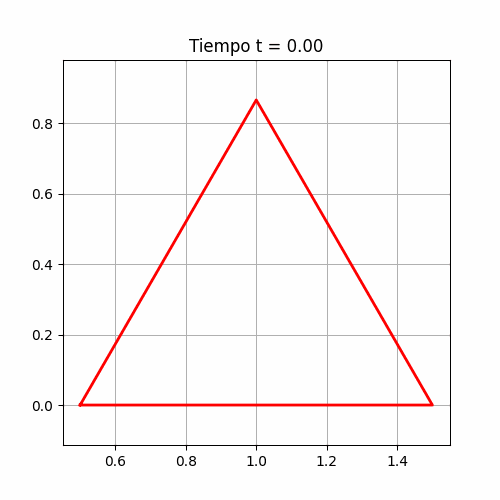

In [ ]:
from IPython.display import Image
Image(filename='animacion_transformaciones.gif')
